In [ ]:
# Install gdown to download from Google Drive
!pip install -q gdown

# Download the ZIP file from Google Drive
import gdown
import zipfile
import os

# Google Drive file ID
file_id = "1OvtlaQjfCmoa7Uso2zNpGHoVE_f2i_9g"
zip_output = "dataset.zip"

# Download using gdown
gdown.download(f"https://drive.google.com/uc?id={file_id}", output=zip_output, quiet=False)

# Extract the ZIP file
extract_dir = "dataset"
with zipfile.ZipFile(zip_output, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# List extracted files
print("Extracted files:")
print(os.listdir(extract_dir))



Downloading...
From (original): https://drive.google.com/uc?id=1OvtlaQjfCmoa7Uso2zNpGHoVE_f2i_9g
From (redirected): https://drive.google.com/uc?id=1OvtlaQjfCmoa7Uso2zNpGHoVE_f2i_9g&confirm=t&uuid=cc12512a-7270-4b24-b970-dd9cdc91f7f8
To: /content/dataset.zip
100%|██████████| 761M/761M [00:05<00:00, 129MB/s]


Extracted files:
['releasev1-detection&tracking']


In [ ]:
import os
import shutil
import random
from pathlib import Path

# Base paths
base_path = "/content/dataset/releasev1-detection&tracking"
rgb_img_path = os.path.join(base_path, "RGB/images")
rgb_lbl_path = os.path.join(base_path, "RGB/labels")


# Output YOLOv8 structure
output_base = Path("/content/yolov8_dataset")
for split in ["train", "val", "test"]:
    (output_base / "images" / split).mkdir(parents=True, exist_ok=True)
    (output_base / "labels" / split).mkdir(parents=True, exist_ok=True)



In [ ]:
# Collect and shuffle all image paths
image_files = sorted([f for f in Path(rgb_img_path).glob("*.jpg")])
print(f"Total images found: {len(image_files)}")

random.seed(42)
random.shuffle(image_files)


Total images found: 57580


In [ ]:
# Define split sizes
train_size = 40000
val_size = 10000
test_size = 6500

train_images = image_files[:train_size]
val_images = image_files[train_size:train_size + val_size]
test_images = image_files[train_size + val_size:train_size + val_size + test_size]


In [ ]:
#check whether the files are available
print(len(train_images))
print(len(val_images))
print(len(test_images))

print(test_images[0])

40000
10000
6500
/content/dataset/releasev1-detection&tracking/RGB/images/BIRD_02584_251_png.rf.d1cb59c634acd7e37a9182b1281f89b3.jpg


In [ ]:
def copy_files(img_list, split):
    copied = 0
    skipped = 0
    for img_path in img_list:
        label_name = img_path.stem + ".txt"
        label_path = Path(rgb_lbl_path) / label_name

        if label_path.exists():
            shutil.copy(img_path, output_base / "images" / split / img_path.name)
            shutil.copy(label_path, output_base / "labels" / split / label_name)
            copied += 1
        else:
            skipped += 1

    print(f"{split.upper()} -> Copied: {copied}, Skipped (no label): {skipped}")

# Copy data
copy_files(train_images, "train")
copy_files(val_images, "val")
copy_files(test_images, "test")


TRAIN -> Copied: 40000, Skipped (no label): 0
VAL -> Copied: 10000, Skipped (no label): 0
TEST -> Copied: 6500, Skipped (no label): 0


In [ ]:
for split in ["train", "val", "test"]:
    num_imgs = len(list((output_base / "images" / split).glob("*.*")))
    num_lbls = len(list((output_base / "labels" / split).glob("*.txt")))
    print(f"{split.upper()}: {num_imgs} images, {num_lbls} labels")


TRAIN: 40000 images, 40000 labels
VAL: 10000 images, 10000 labels
TEST: 6500 images, 6500 labels


In [ ]:
!pip install ultralytics



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 38.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 119.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 90.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 64.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [ ]:
dataset_yaml = """
path: /content/yolov8_dataset
train: images/train
val: images/val
test: images/test

nc: 2  # Number of classes
names: ['bird','drone']  # Replace with your class names if more than one
"""

with open("dataset.yaml", "w") as f:
    f.write(dataset_yaml)


In [11]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")  # or yolov8s.pt / yolov8m.pt based on your needs
model.train(data="dataset.yaml", epochs=40, imgsz=320, batch=16)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 325MB/s]


Ultralytics 8.3.128 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=40, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=320, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, profile=F

100%|██████████| 755k/755k [00:00<00:00, 111MB/s]

Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

Model summary: 129 layers, 3,011,238 parameters, 3,011,222 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 372MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4.7±1.1 MB/s, size: 6.8 KB)


train: Scanning /content/yolov8_dataset/labels/train... 40000 images, 0 backgrounds, 0 corrupt: 100%|██████████| 40000/40000 [00:32<00:00, 1219.82it/s]


train: New cache created: /content/yolov8_dataset/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1.5±1.1 MB/s, size: 5.4 KB)


val: Scanning /content/yolov8_dataset/labels/val... 10000 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10000/10000 [00:08<00:00, 1222.55it/s]


val: New cache created: /content/yolov8_dataset/labels/val.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 320 train, 320 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 40 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/40     0.584G      2.223      2.307      1.009         20        320: 100%|██████████| 2500/2500 [05:16<00:00,  7.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [00:47<00:00,  6.55it/s]


                   all      10000      11217      0.812      0.716       0.77      0.315

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/40     0.713G      2.098      1.415       0.98         40        320: 100%|██████████| 2500/2500 [05:03<00:00,  8.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [00:45<00:00,  6.90it/s]


                   all      10000      11217       0.81      0.612      0.699      0.278

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/40     0.717G      2.079      1.338     0.9755         30        320: 100%|██████████| 2500/2500 [05:00<00:00,  8.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [00:46<00:00,  6.76it/s]


                   all      10000      11217      0.833      0.699       0.76      0.311

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/40     0.729G      2.048      1.288     0.9702         24        320: 100%|██████████| 2500/2500 [04:58<00:00,  8.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [00:45<00:00,  6.87it/s]


                   all      10000      11217      0.885      0.764      0.829      0.369

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/40     0.738G      1.981      1.213     0.9568         32        320: 100%|██████████| 2500/2500 [04:59<00:00,  8.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [00:45<00:00,  6.90it/s]


                   all      10000      11217      0.897      0.782      0.843      0.372

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/40      0.75G      1.944      1.172     0.9517         28        320: 100%|██████████| 2500/2500 [05:01<00:00,  8.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [00:46<00:00,  6.79it/s]


                   all      10000      11217      0.911      0.808      0.864      0.396

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/40     0.762G      1.907       1.13     0.9433         21        320: 100%|██████████| 2500/2500 [04:55<00:00,  8.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [00:45<00:00,  6.85it/s]


                   all      10000      11217      0.885      0.802      0.862      0.395

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/40     0.771G      1.872      1.098     0.9359         23        320: 100%|██████████| 2500/2500 [04:54<00:00,  8.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [00:45<00:00,  6.91it/s]


                   all      10000      11217      0.913      0.837      0.885      0.425

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/40     0.783G      1.851      1.077     0.9336         21        320: 100%|██████████| 2500/2500 [04:55<00:00,  8.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [00:44<00:00,  6.96it/s]


                   all      10000      11217      0.915      0.829      0.887       0.43

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/40     0.795G      1.825      1.058     0.9283         28        320: 100%|██████████| 2500/2500 [04:52<00:00,  8.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [00:44<00:00,  7.07it/s]

                   all      10000      11217      0.904      0.844      0.892      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/40     0.807G        1.8      1.034     0.9238         28        320: 100%|██████████| 2500/2500 [04:53<00:00,  8.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [00:44<00:00,  7.02it/s]


                   all      10000      11217      0.919      0.848      0.903      0.466

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/40     0.816G      1.783      1.013     0.9211         26        320: 100%|██████████| 2500/2500 [04:54<00:00,  8.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [00:45<00:00,  6.87it/s]


                   all      10000      11217      0.914      0.856      0.906      0.469

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/40     0.828G      1.763     0.9998     0.9184         31        320: 100%|██████████| 2500/2500 [04:51<00:00,  8.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [00:45<00:00,  6.81it/s]


                   all      10000      11217      0.912      0.866      0.913      0.479

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/40      0.84G      1.739     0.9783     0.9155         23        320: 100%|██████████| 2500/2500 [04:51<00:00,  8.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [00:45<00:00,  6.94it/s]

                   all      10000      11217      0.925      0.876      0.919      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/40     0.852G      1.713     0.9643     0.9113         29        320: 100%|██████████| 2500/2500 [04:49<00:00,  8.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [00:44<00:00,  6.98it/s]

                   all      10000      11217      0.924      0.873      0.921        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/40     0.863G      1.709     0.9582     0.9129         21        320: 100%|██████████| 2500/2500 [04:51<00:00,  8.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [00:44<00:00,  6.96it/s]

                   all      10000      11217      0.929      0.879      0.926      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/40     0.873G      1.679     0.9341     0.9074         26        320: 100%|██████████| 2500/2500 [04:49<00:00,  8.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [00:45<00:00,  6.91it/s]

                   all      10000      11217      0.932       0.88      0.931      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/40     0.885G      1.662     0.9217     0.9039         27        320: 100%|██████████| 2500/2500 [04:50<00:00,  8.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [00:45<00:00,  6.92it/s]

                   all      10000      11217      0.929      0.886      0.933      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/40     0.896G       1.65      0.909     0.9014         23        320: 100%|██████████| 2500/2500 [04:49<00:00,  8.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [00:45<00:00,  6.85it/s]

                   all      10000      11217       0.93      0.888      0.936      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/40     0.908G      1.623     0.8914     0.8974         29        320: 100%|██████████| 2500/2500 [04:49<00:00,  8.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [00:45<00:00,  6.94it/s]

                   all      10000      11217      0.932      0.889      0.937      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/40      0.92G      1.611     0.8822     0.8966         24        320: 100%|██████████| 2500/2500 [04:48<00:00,  8.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [00:44<00:00,  7.08it/s]

                   all      10000      11217      0.932      0.891      0.939      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/40     0.932G      1.597     0.8697     0.8944         22        320: 100%|██████████| 2500/2500 [04:53<00:00,  8.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [00:45<00:00,  6.91it/s]

                   all      10000      11217      0.937      0.895      0.942      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/40     0.943G      1.574     0.8508     0.8916         28        320: 100%|██████████| 2500/2500 [04:57<00:00,  8.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [00:45<00:00,  6.94it/s]

                   all      10000      11217       0.94      0.895      0.943      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/40     0.953G      1.559      0.836     0.8885         35        320: 100%|██████████| 2500/2500 [04:56<00:00,  8.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [00:44<00:00,  6.98it/s]


                   all      10000      11217      0.939      0.899      0.944      0.546

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/40     0.965G      1.536     0.8229     0.8867         23        320: 100%|██████████| 2500/2500 [04:56<00:00,  8.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [00:45<00:00,  6.85it/s]

                   all      10000      11217       0.94      0.901      0.946      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/40     0.977G      1.529     0.8178     0.8856         25        320: 100%|██████████| 2500/2500 [04:46<00:00,  8.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [00:45<00:00,  6.91it/s]


                   all      10000      11217      0.942      0.901      0.946      0.553

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/40     0.988G      1.509     0.8078     0.8843         23        320: 100%|██████████| 2500/2500 [04:49<00:00,  8.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [00:44<00:00,  7.11it/s]

                   all      10000      11217      0.943      0.902      0.947      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/40         1G      1.496     0.7906     0.8818         32        320: 100%|██████████| 2500/2500 [04:47<00:00,  8.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [00:44<00:00,  6.97it/s]

                   all      10000      11217      0.943      0.904      0.947      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/40      1.01G      1.475     0.7804      0.879         17        320: 100%|██████████| 2500/2500 [04:47<00:00,  8.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [00:44<00:00,  7.00it/s]

                   all      10000      11217      0.946      0.905      0.948      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/40      1.02G      1.461     0.7671     0.8769         33        320: 100%|██████████| 2500/2500 [04:44<00:00,  8.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [00:43<00:00,  7.12it/s]

                   all      10000      11217      0.947      0.906       0.95      0.563


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/40      1.03G      1.347     0.6854     0.8764         17        320: 100%|██████████| 2500/2500 [04:39<00:00,  8.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [00:44<00:00,  7.00it/s]


                   all      10000      11217      0.949      0.907       0.95      0.566

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/40      1.04G      1.313     0.6665     0.8717         18        320: 100%|██████████| 2500/2500 [04:44<00:00,  8.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [00:45<00:00,  6.91it/s]

                   all      10000      11217       0.95      0.908      0.952       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/40      1.06G      1.283     0.6468     0.8677         17        320: 100%|██████████| 2500/2500 [04:45<00:00,  8.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [00:44<00:00,  6.97it/s]


                   all      10000      11217      0.951       0.91      0.953      0.574

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/40      1.07G      1.259     0.6333     0.8636         16        320: 100%|██████████| 2500/2500 [04:42<00:00,  8.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [00:45<00:00,  6.92it/s]

                   all      10000      11217      0.951      0.911      0.954      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/40      1.08G      1.229     0.6168     0.8607         17        320: 100%|██████████| 2500/2500 [04:43<00:00,  8.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [00:44<00:00,  6.99it/s]

                   all      10000      11217      0.953      0.913      0.955      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/40      1.09G      1.209     0.6048     0.8572         21        320: 100%|██████████| 2500/2500 [04:43<00:00,  8.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [00:45<00:00,  6.88it/s]

                   all      10000      11217      0.955      0.913      0.956      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/40       1.1G      1.187     0.5918     0.8547         19        320: 100%|██████████| 2500/2500 [04:39<00:00,  8.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [00:45<00:00,  6.81it/s]

                   all      10000      11217      0.955      0.915      0.957      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/40      1.11G      1.164     0.5812     0.8502         21        320: 100%|██████████| 2500/2500 [04:39<00:00,  8.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [00:45<00:00,  6.85it/s]

                   all      10000      11217      0.956      0.917      0.958      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/40      1.12G      1.143     0.5714     0.8476         19        320: 100%|██████████| 2500/2500 [04:41<00:00,  8.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [00:46<00:00,  6.72it/s]

                   all      10000      11217      0.957      0.918      0.959      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/40      1.14G      1.124     0.5605     0.8465         17        320: 100%|██████████| 2500/2500 [04:59<00:00,  8.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [00:44<00:00,  7.04it/s]

                   all      10000      11217      0.958      0.918      0.959        0.6



40 epochs completed in 3.744 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.128 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [00:48<00:00,  6.43it/s]


                   all      10000      11217      0.957      0.918      0.959        0.6
                  bird       3667       4884      0.949      0.867      0.933      0.524
                 drone       6333       6333      0.964       0.97      0.985      0.676
Speed: 0.1ms preprocess, 0.7ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c9480da8d10>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [20]:
from google.colab import files
files.download('/content/runs/detect/train/weights/best.pt')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [24]:
from ultralytics import YOLO

# Load the trained model
model = YOLO('/content/runs/detect/train/weights/best.pt')

# Run validation on the test set using data.yaml
results = model.val(
    data='/content/dataset.yaml',  # path to your dataset config
    split='test'                # run on the test split
)




Ultralytics 8.3.128 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 264.0±115.4 MB/s, size: 5.6 KB)


val: Scanning /content/yolov8_dataset/labels/test.cache... 6500 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6500/6500 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 407/407 [00:33<00:00, 12.09it/s]


                   all       6500       7329      0.954      0.915      0.959        0.6
                  bird       2311       3140      0.947      0.865      0.936      0.516
                 drone       4189       4189      0.962      0.965      0.982      0.683
Speed: 0.1ms preprocess, 1.2ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/val3
mAP50: 0.9587
mAP50-95: 0.5997


TypeError: 'numpy.float64' object is not callable

In [26]:
print(f"mAP50: {results.box.map50:.4f}")
print(f"mAP50-95: {results.box.map:.4f}")
print(f"Mean Precision: {results.box.mp:.4f}")
print(f"Mean Recall: {results.box.mr:.4f}")


mAP50: 0.9587
mAP50-95: 0.5997
Mean Precision: 0.9544
Mean Recall: 0.9148



image 1/1 /content/yolov8_dataset/images/test/DRONE_012122_293_png.rf.de8bb5d900fa7a9e9b03de2a98329a9e.jpg: 256x320 1 drone, 54.6ms
Speed: 0.9ms preprocess, 54.6ms inference, 2.5ms postprocess per image at shape (1, 3, 256, 320)


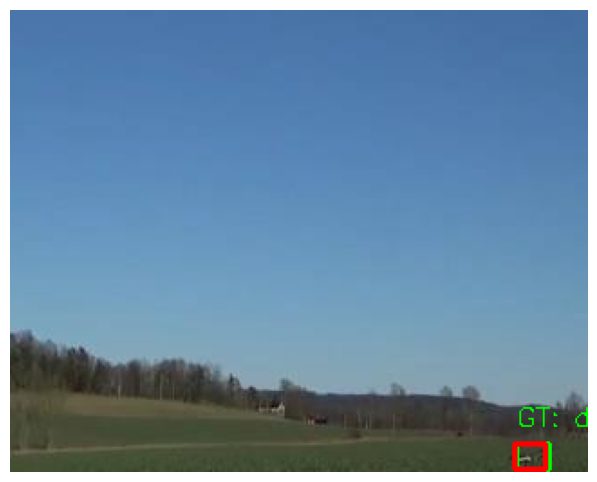


image 1/1 /content/yolov8_dataset/images/test/DRONE_067177_165_png.rf.1e36365b993f7fc6288a8eb0a2687152.jpg: 256x320 1 drone, 13.8ms
Speed: 0.8ms preprocess, 13.8ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 320)


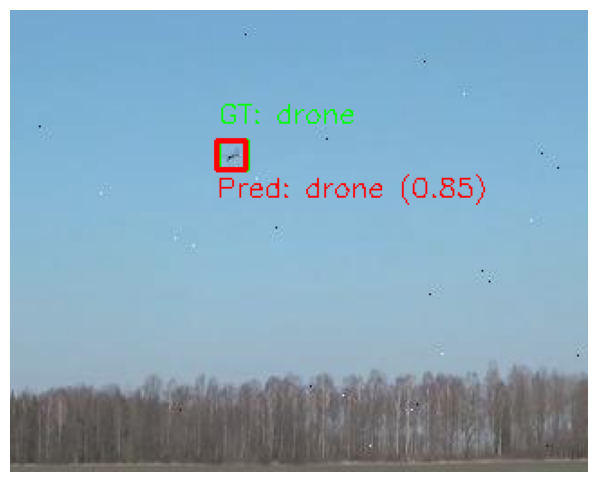


image 1/1 /content/yolov8_dataset/images/test/DRONE_059169_178_png.rf.641c4f0fc6520de07055c85a24bfd080.jpg: 256x320 1 drone, 15.2ms
Speed: 1.9ms preprocess, 15.2ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 320)


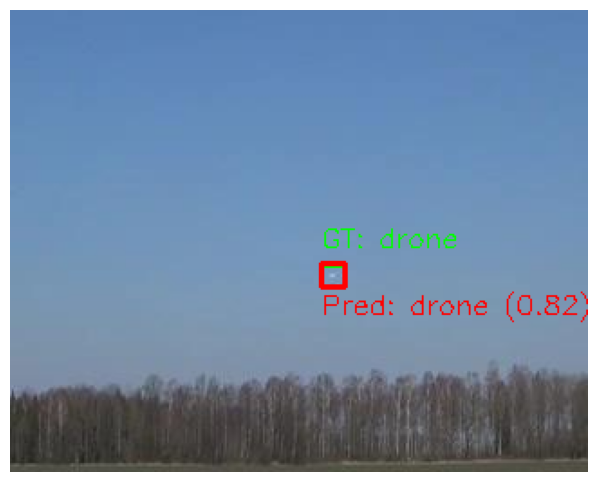


image 1/1 /content/yolov8_dataset/images/test/DRONE_071181_256_png.rf.2ff33e470d0bacce3ae7874dc52a940a.jpg: 256x320 1 drone, 14.4ms
Speed: 0.9ms preprocess, 14.4ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 320)


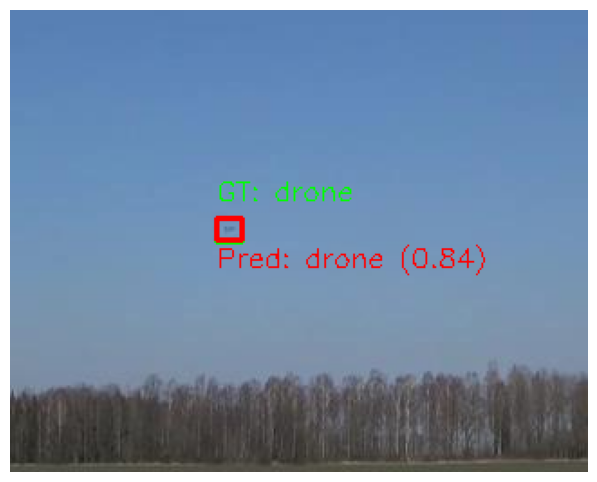


image 1/1 /content/yolov8_dataset/images/test/BIRD_01372_040_png.rf.7ee08e3891937472a3592b71a88c965f.jpg: 256x320 1 bird, 12.6ms
Speed: 0.9ms preprocess, 12.6ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 320)


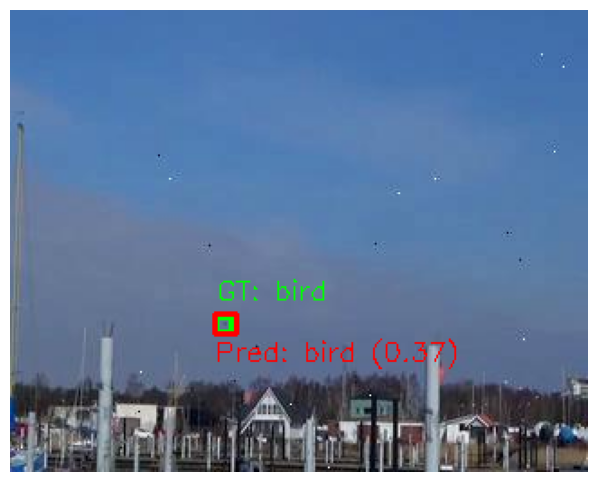


image 1/1 /content/yolov8_dataset/images/test/DRONE_034144_223_png.rf.5698d9ec4e54896211db1e6a8fd96c42.jpg: 256x320 1 drone, 12.3ms
Speed: 1.0ms preprocess, 12.3ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 320)


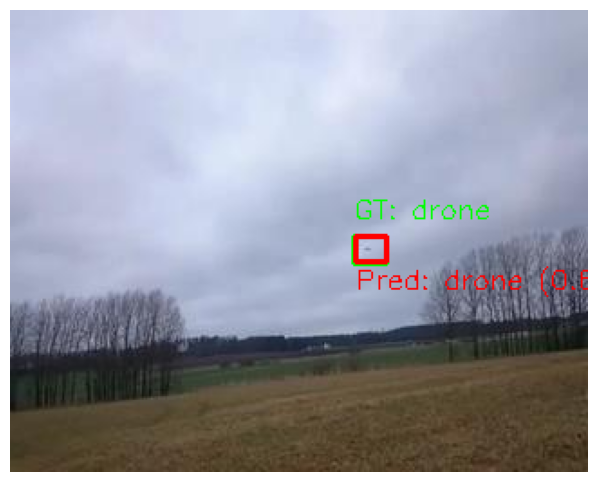


image 1/1 /content/yolov8_dataset/images/test/BIRD_02483_285_png.rf.b7fed4152092d38d2234a8e8da664d27.jpg: 256x320 1 bird, 21.6ms
Speed: 1.1ms preprocess, 21.6ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 320)


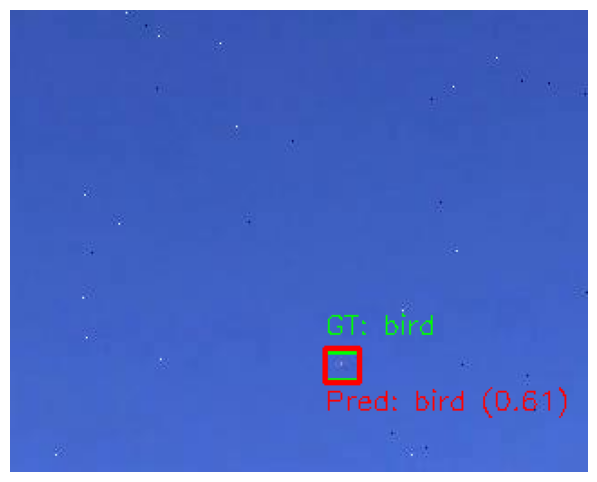


image 1/1 /content/yolov8_dataset/images/test/BIRD_01069_121_png.rf.ff40f416eadb9c5d14f2814bd33c356d.jpg: 256x320 1 bird, 12.0ms
Speed: 0.9ms preprocess, 12.0ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 320)


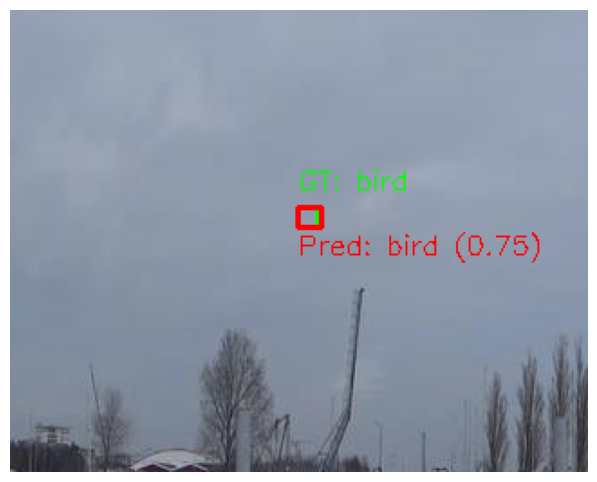


image 1/1 /content/yolov8_dataset/images/test/DRONE_023133_258_png.rf.2b19f56657a389995aad57d3741631d5.jpg: 256x320 1 drone, 14.6ms
Speed: 1.1ms preprocess, 14.6ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 320)


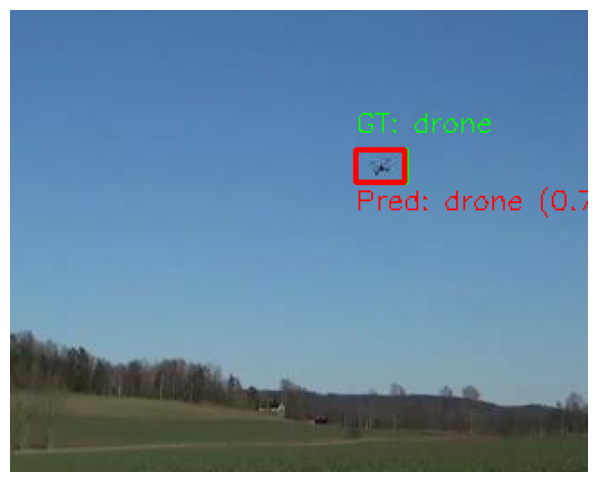


image 1/1 /content/yolov8_dataset/images/test/DRONE_072182_168_png.rf.35d6e2bdb94281f4090ff26e33b6b00f.jpg: 256x320 2 drones, 12.6ms
Speed: 0.9ms preprocess, 12.6ms inference, 1.8ms postprocess per image at shape (1, 3, 256, 320)


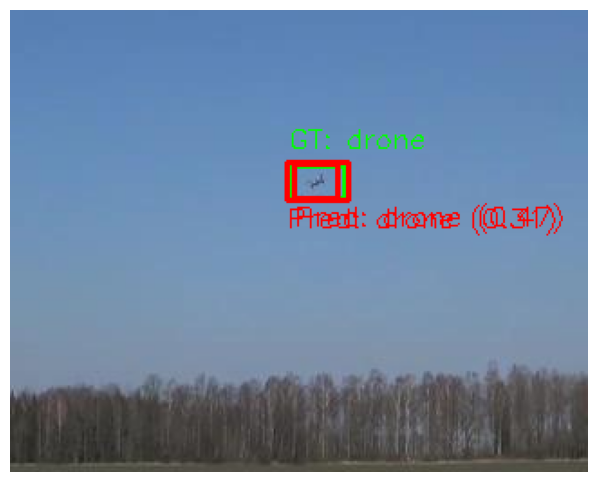


image 1/1 /content/yolov8_dataset/images/test/DRONE_014124_323_png.rf.23b00882ce395419133b4027213d7d67.jpg: 256x320 1 drone, 14.3ms
Speed: 0.9ms preprocess, 14.3ms inference, 2.9ms postprocess per image at shape (1, 3, 256, 320)


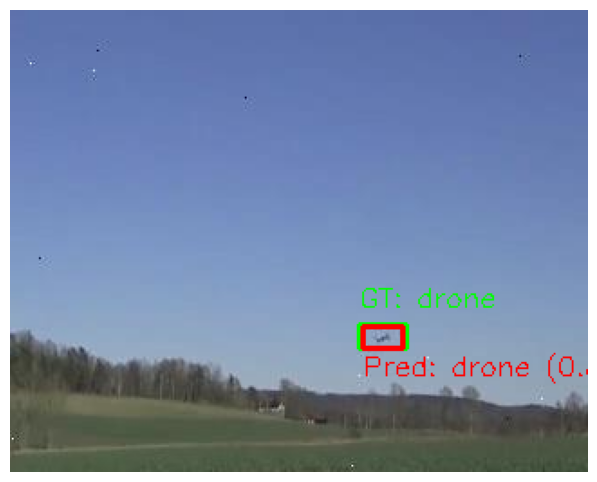


image 1/1 /content/yolov8_dataset/images/test/DRONE_015125_045_png.rf.71597c08eeea25068d97d96e9e5b9954.jpg: 256x320 1 drone, 11.3ms
Speed: 1.1ms preprocess, 11.3ms inference, 1.8ms postprocess per image at shape (1, 3, 256, 320)


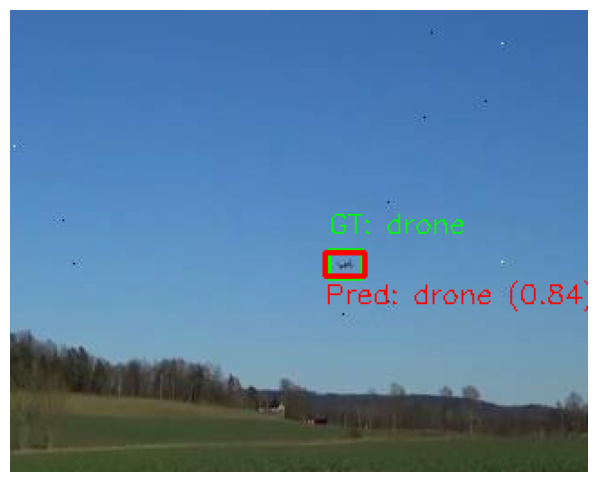


image 1/1 /content/yolov8_dataset/images/test/BIRD_03190_200_png.rf.409c1d2867a3a846cae49b4c3e3c75e4.jpg: 256x320 1 bird, 11.7ms
Speed: 0.9ms preprocess, 11.7ms inference, 2.4ms postprocess per image at shape (1, 3, 256, 320)


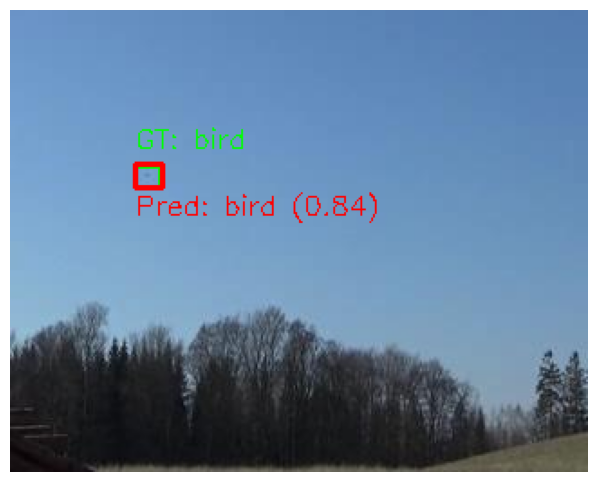


image 1/1 /content/yolov8_dataset/images/test/DRONE_056166_287_png.rf.8bd2fa9f85750e9a9e032d6ae3749543.jpg: 256x320 1 drone, 9.3ms
Speed: 0.8ms preprocess, 9.3ms inference, 2.7ms postprocess per image at shape (1, 3, 256, 320)


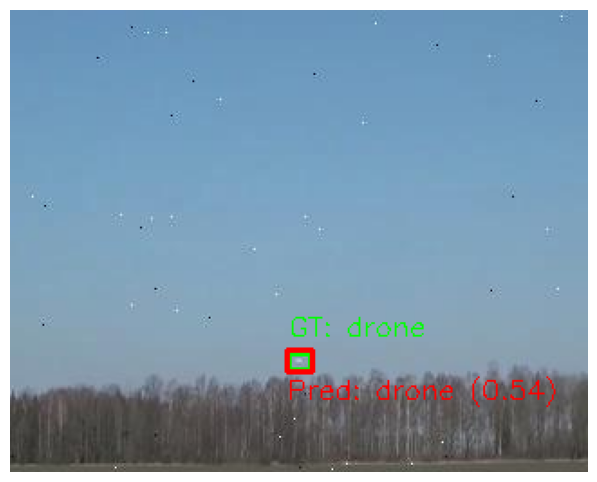


image 1/1 /content/yolov8_dataset/images/test/DRONE_042152_115_png.rf.df0cecd16d895980f9ac05791b08ce3c.jpg: 256x320 1 drone, 17.8ms
Speed: 1.0ms preprocess, 17.8ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 320)


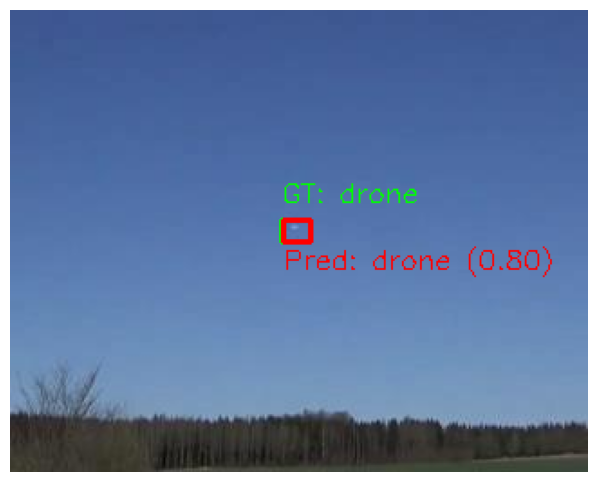


image 1/1 /content/yolov8_dataset/images/test/BIRD_03695_147_png.rf.65c02fe1d73c049f0938574e8277bb57.jpg: 256x320 1 bird, 10.1ms
Speed: 0.9ms preprocess, 10.1ms inference, 1.8ms postprocess per image at shape (1, 3, 256, 320)


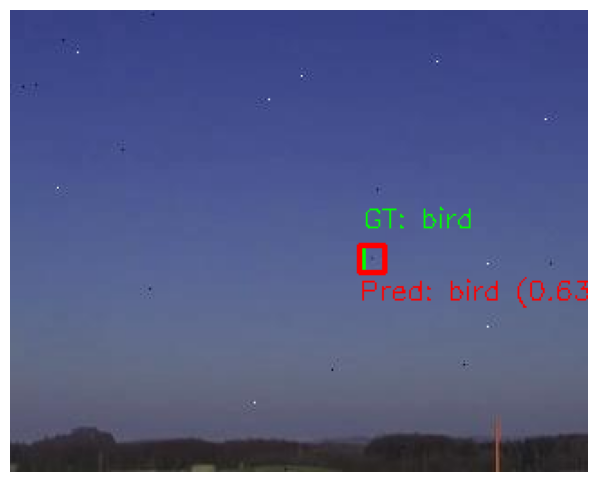


image 1/1 /content/yolov8_dataset/images/test/BIRD_03190_135_png.rf.c6c5f4525fc0baa8f02b25147fc70182.jpg: 256x320 1 bird, 12.3ms
Speed: 1.2ms preprocess, 12.3ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 320)


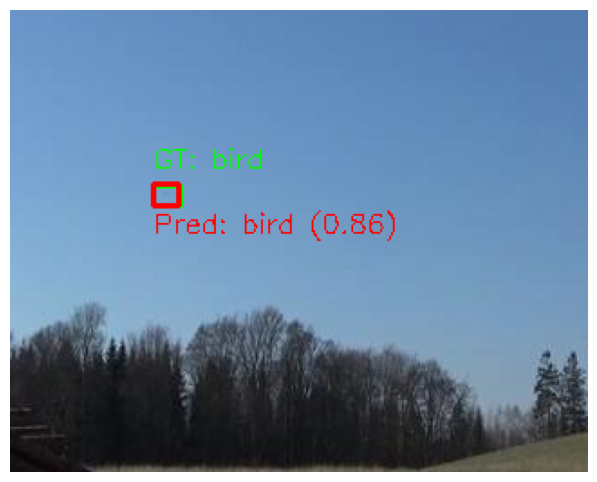


image 1/1 /content/yolov8_dataset/images/test/DRONE_078188_071_png.rf.425b1015b05ff8ed75a0348655ccc565.jpg: 256x320 1 drone, 10.0ms
Speed: 0.9ms preprocess, 10.0ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 320)


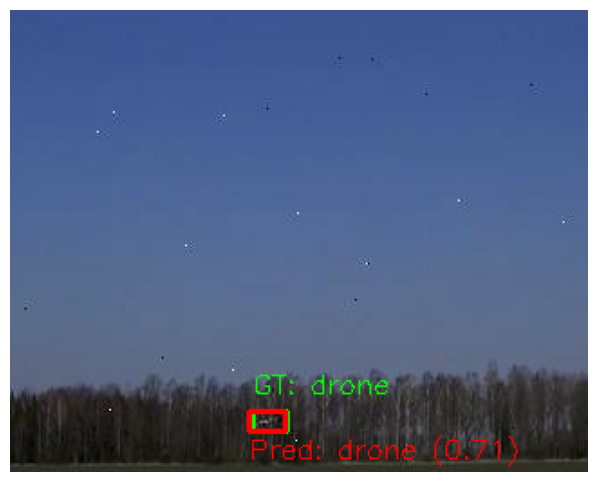


image 1/1 /content/yolov8_dataset/images/test/DRONE_059169_169_png.rf.d3ca1101677bd9a393896644f7ed4cdc.jpg: 256x320 1 drone, 12.2ms
Speed: 0.8ms preprocess, 12.2ms inference, 1.8ms postprocess per image at shape (1, 3, 256, 320)


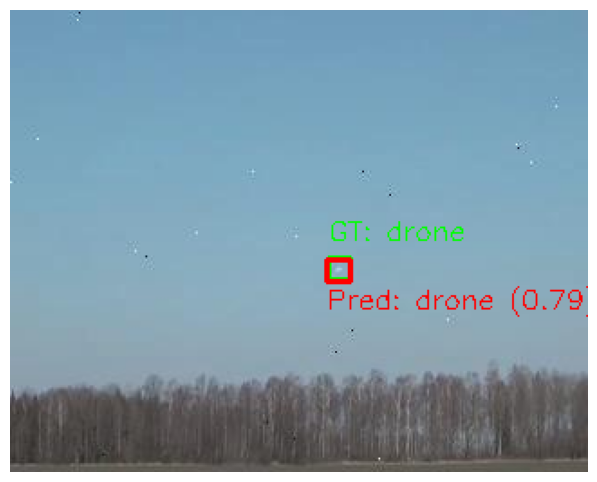


image 1/1 /content/yolov8_dataset/images/test/BIRD_03190_068_png.rf.1f02e1371d7d7bab19fbd162afbb47aa.jpg: 256x320 1 bird, 9.9ms
Speed: 0.8ms preprocess, 9.9ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 320)


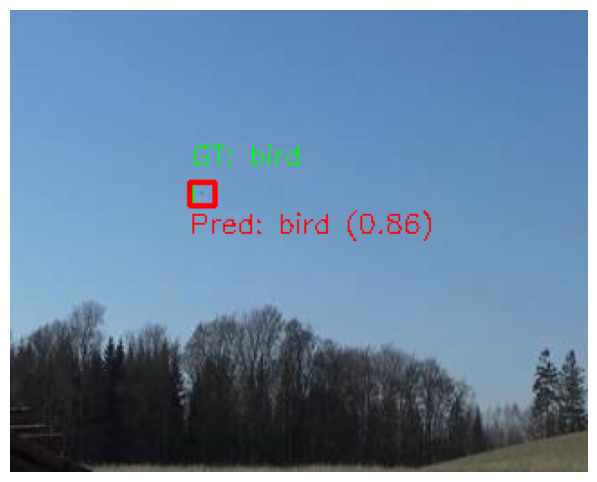

In [27]:
import os
import random
import cv2
import matplotlib.pyplot as plt
from pathlib import Path
from ultralytics import YOLO

# Load the model
model = YOLO('runs/detect/train/weights/best.pt')  # or any trained YOLOv8 model

# Paths
img_dir = Path("/content/yolov8_dataset/images/test")
label_dir = Path("/content/yolov8_dataset/labels/test")
class_names = model.names  # class names from the model

# Get random 20 image files
image_files = random.sample(list(img_dir.glob("*.jpg")), 20)

# Plotting function
def show_image_with_boxes(image_path, label_path, model):
    image = cv2.imread(str(image_path))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    h, w, _ = image.shape

    # Draw ground truth boxes from label
    if os.path.exists(label_path):
        with open(label_path, "r") as f:
            for line in f:
                cls_id, x_center, y_center, bw, bh = map(float, line.strip().split())
                x1 = int((x_center - bw / 2) * w)
                y1 = int((y_center - bh / 2) * h)
                x2 = int((x_center + bw / 2) * w)
                y2 = int((y_center + bh / 2) * h)
                cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
                cv2.putText(image, f"GT: {class_names[int(cls_id)]}", (x1, y1 - 10),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)

    # Run prediction
    results = model(str(image_path))
    for r in results:
        for box in r.boxes:
            cls_pred = int(box.cls[0])
            conf = float(box.conf[0])
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 2)
            cv2.putText(image, f"Pred: {class_names[cls_pred]} ({conf:.2f})", (x1, y2 + 15),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)

    # Show
    plt.figure(figsize=(10, 6))
    plt.imshow(image)
    plt.axis('off')
    plt.show()

# Process 20 images
for img_path in image_files:
    label_path = label_dir / (img_path.stem + ".txt")
    show_image_with_boxes(img_path, label_path, model)
